# Lab 2

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Úkol 1

In [ ]:
df_female = pd.read_csv('ANSUR_II_FEMALE.csv')
df_male = pd.read_csv('ANSUR_II_MALE.csv')

df = pd.concat([df_male, df_female])

In [3]:
df

,ID,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1981,Combat Support,Army National Guard,Female,285,1392,335,223,1297,252,...,265,370,1002,162,836,83.2,1.687,29.234331,Overweight,Normal
1982,1982,Combat Support,Army National Guard,Female,262,1324,301,202,1204,236,...,243,374,958,157,804,71.7,1.613,27.558173,Overweight,Normal
1983,1983,Combat Support,Army National Guard,Female,260,1334,318,213,1259,234,...,254,351,970,159,774,76.2,1.644,28.193653,Overweight,Normal
1984,1984,Combat Support,Army National Guard,Female,205,1293,302,199,1207,213,...,208,335,952,146,769,63.2,1.616,24.201059,Normal,Normal


In [6]:
guard_df = df[df['Component'] == 'Army National Guard']
army_df = df[df['Component'] == 'Regular Army']
print(f"National Guard: {len(guard_df)}")
print(f"Army: {len(army_df)}")

National Guard: 2708
Army: 3140


In [10]:
guard_table = pd.crosstab(guard_df['Branch'], guard_df['BMI_class'])
army_table = pd.crosstab(army_df['Branch'], army_df['BMI_class'])

guard_table

BMI_class,Normal,Overweight,Underweight
Branch,,,
Combat Arms,212,595,0
Combat Service Support,533,888,4
Combat Support,136,337,3


In [11]:
army_table

BMI_class,Normal,Overweight,Underweight
Branch,,,
Combat Arms,229,538,2
Combat Service Support,538,1057,8
Combat Support,250,514,4


In [ ]:
from scipy.stats import chi2_contingency

chi2_guard, p_guard, dof_guard, expected_guard = chi2_contingency(guard_table)
print("National Guard:")
print(f"X2 = {chi2_guard:.4f}, p-value = {p_guard:.4f}")

chi2_army, p_army, dof_army, expected_army = chi2_contingency(army_table)
print("Regular Army:")
print(f"X2 = {chi2_army:.4f}, p-value = {p_army:.4f}")

National Guard:
X2 = 38.1693, p-value = 0.0000
Regular Army:
X2 = 4.3591, p-value = 0.3596


**Regular Army**
![Army](sieve_army.png)


**National Guard**
![Guard](sieve_guard.png)

### Srovnání

**National Guard**
- Jelikož je p-hodnota menší než 0.05 můžeme říct, že je zde statistická korelace mezi složkou armády a BMI.
- To stejné je patrné ze síťového grafu, kde jsou rozdíly mezi jednotlivými částmi výrazně větší a je vidět, že např. pozorovaná četnost u Overweight jedinců v Combat Service Support je výrazně více než je očekávaná.

**Regular Army**
- Pro standartní armádu platí hypotéza, že neexistuje korelace mezi danými hodnotami.

### Sutinový graf a PCA
- Pro pokrytí 90% variability je potřeba 21 hlavních komponent

![PCA](PCA_full.png)
![PCA](PCA.png)

### 2015 vs 1988


In [ ]:
df_female_1988 = pd.read_csv('ansurWomen.csv')
df_male_1988 = pd.read_csv('ansurMen.csv')

In [62]:
# Weight (kg), Height (m)
df_female_1988["BMI"] = df_female_1988["WEIGHT"]/10 / pow(df_female_1988["STATURE"]/1000, 2)

df_male_1988["BMI"] = df_male_1988["WEIGHT"]/10 / pow(df_male_1988["STATURE"]/1000, 2)


In [58]:
df_1988 = pd.concat([df_male_1988, df_female_1988])

In [59]:
df_1988["BMI"]

0       29.333355
1       25.829377
2       23.933596
3       25.667731
4       27.139955
          ...    
2203    25.513231
2204    25.298704
2205    22.149144
2206    26.791259
2207    25.794877
Name: BMI, Length: 3982, dtype: float64

In [68]:
df_male_1988['sex'] = 'men'
df_male_1988['year'] = '1988'

df_male['sex'] = 'men'
df_male['year'] = '2015'

df_female_1988['sex'] = 'women'
df_female_1988['year'] = '1988'

df_female['sex'] = 'women'
df_female['year'] = '2015'

# Spojení všech do jednoho
df_all = pd.concat([df_male, df_male_1988, df_female_1988, df_female], ignore_index=True)


**Ženy**

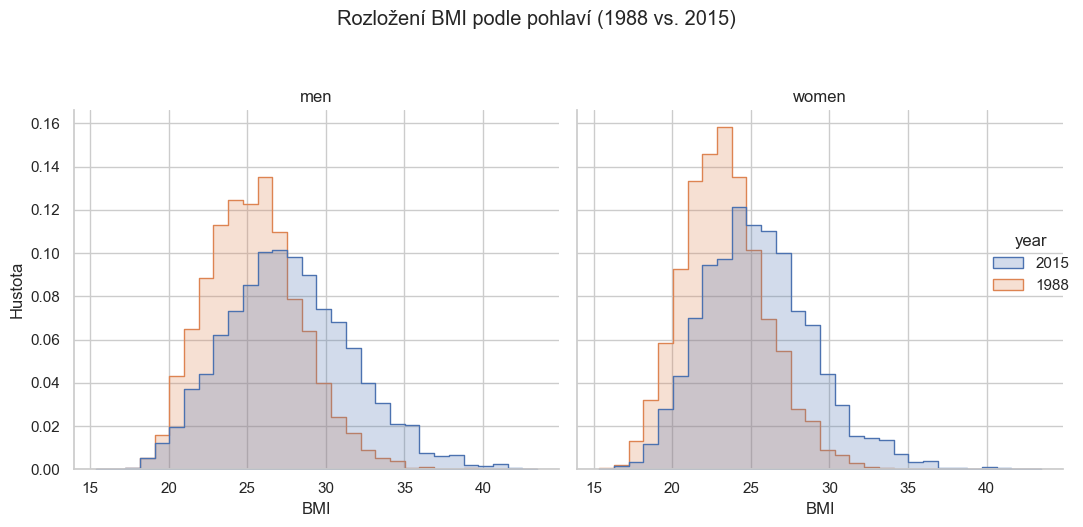

In [ ]:
# Histogram rozdělený podle pohlaví a roku
sns.set(style="whitegrid")

g = sns.displot(
    data=df_all, x="BMI", hue="year",
    col="sex", kind="hist", bins=30, element="step", stat="density",
    common_norm=False
)

g.set_titles("{col_name}")
g.set_axis_labels("BMI", "Hustota")
plt.suptitle("Rozložení BMI podle pohlaví (1988 vs. 2015)", y=1.05)
plt.tight_layout()
plt.show()


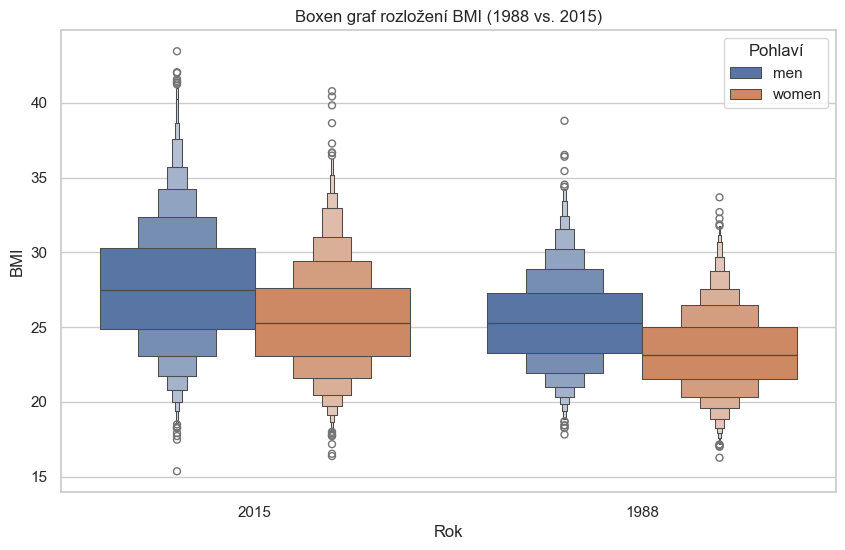

In [70]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_all, x="year", y="BMI", hue="sex")
plt.title("Boxen graf rozložení BMI (1988 vs. 2015)")
plt.xlabel("Rok")
plt.ylabel("BMI")
plt.legend(title="Pohlaví")
plt.show()


**Srovnání**
- Z grafů je patrné, že BMI v roce 2015 oproti roku 1988 je průměrně vyšší a i medián BMI má vyšší hodnotu. Toto lze interpretovato tak, že příslušníci jednotek v roce 2015 jsou průměrně hmotnější, než příslušníci se stejnou výškou v roce 1988.

## Úkol 2

In [3]:
df = pd.read_csv("uhrazene_faktury.csv", sep=";", encoding='utf-8')

In [66]:
df

,iri,typ_dokladu,částka_s_dph,částka_uhrazená,částka_celkem_devizy_výše,částka_celkem_devizy_měna,datum_úhrady,datum_splatnosti,datum_přijetí,datum_plnění,identifikátor_dodavatele,identifikátor_odběratele,účel_platby,identifikátor_smlouvy,dodavatel_název,dodavatel_ičo,odběratel_název,odběratel_ičo,kapitola_rozpočtu_číslo,kapitola_rozpočtu_název
0,A400P06O03QK,Zálohová faktura dodavatelská,1720,1720,0,CZK,20.01.2015,15.01.2015,08.01.2015,08.01.2015,A499SE055JV2,60162694.0,0401 - dodávky pitné vody a odvádění odpadních...,A499XOOILER5,Sč. vodovody a kanalizace,49099451.0,Ministerstvo obrany,60162694.0,307.0,Ministerstvo obrany
1,A400P06PNCZS,Faktura dodavatelská,62299,62299,0,CZK,20.01.2015,20.01.2015,06.01.2015,31.12.2014,A499SE06YCZX,60162694.0,Likvidace komunálního odpadu 2006 - Brno,A400P03UPO0T,AVE CZ odpadové hospodářs,49356089.0,Ministerstvo obrany,60162694.0,307.0,Ministerstvo obrany
2,A400P05097UU,Faktura dodavatelská,1080,1080,0,CZK,21.01.2015,25.01.2015,08.01.2015,31.12.2014,A499SE05Q0P0,60162694.0,"0715, 0735 - Dodávky pitné vody a odvádění odp...",A400P06PSUF9,Vodovody a kanal. Přerov,47674521.0,Ministerstvo obrany,60162694.0,307.0,Ministerstvo obrany
3,A400P05097VP,Faktura dodavatelská,2283,2283,0,CZK,21.01.2015,28.01.2015,08.01.2015,31.12.2014,A499SE05VLP4,60162694.0,Dodávky vody do objektu RTH Stará Ves nad Ondř...,A499XOOIGYY3,Severomoravské vodovody,45193665.0,Ministerstvo obrany,60162694.0,307.0,Ministerstvo obrany
4,A400P05098IB,Faktura dodavatelská,202923,202923,0,CZK,21.01.2015,25.01.2015,06.01.2015,31.12.2014,A499SE05Q0P0,60162694.0,"0715, 0735 - Dodávky pitné vody a odvádění odp...",A400P06PSUF9,Vodovody a kanal. Přerov,47674521.0,Ministerstvo obrany,60162694.0,307.0,Ministerstvo obrany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137639,A499XOSSH4PZ,Faktura dodavatelská,"104077,56","104077,56",0,CZK,30.12.2024,18.01.2025,19.12.2024,19.12.2024,A499SE08E2JD,60162694.0,18172 RD-běžné opravy a servis vozidel FORD pr...,A499XOSRNOVK,Autoservis RADAC s.r.o.,25549391.0,Ministerstvo obrany,60162694.0,307.0,Ministerstvo obrany
137640,A499XOSRW97K,Faktura dodavatelská,"132168,3","132168,3",0,CZK,30.12.2024,05.01.2025,09.12.2024,09.12.2024,A499SE0AT5AO,60162694.0,Čj. MO 759042/2024-5810 - RD (NEN) „Nákup spor...,A499XOSPTB82,"SPORTBART, s.r.o.",6680429.0,Ministerstvo obrany,60162694.0,307.0,Ministerstvo obrany
137641,A499XOSSEZDP,Faktura dodavatelská,"142187,1","142187,1",0,CZK,30.12.2024,14.01.2025,18.12.2024,15.12.2024,A499SE0ASMQI,60162694.0,16818 RD-opravy a servis nástaveb vyprošťovací...,A499XOSR6MKM,Michal Juhaňák,88858642.0,Ministerstvo obrany,60162694.0,307.0,Ministerstvo obrany
137642,A499XOSSEZMG,Faktura dodavatelská,125840,125840,0,CZK,30.12.2024,14.01.2025,18.12.2024,15.12.2024,A499SE0ASMQI,60162694.0,16818 RD-opravy a servis nástaveb vyprošťovací...,A499XOSRY6YO,Michal Juhaňák,88858642.0,Ministerstvo obrany,60162694.0,307.0,Ministerstvo obrany


In [4]:
df['Datum'] = pd.to_datetime(df['datum_plnění'], format="%d.%m.%Y")
df['Rok'] = df['Datum'].dt.year

df['částka_uhrazená'] = (
    df['částka_uhrazená']
    .astype(str)
    .str.replace(',', '.', regex=False)  # Convert decimal comma to dot
    .str.replace(r'[^\d.-]', '', regex=True)  # Remove non-numeric characters (just in case)
    .astype(float)
)

In [5]:
df_grouped = df.groupby(['Rok', 'dodavatel_ičo'], as_index=False).agg(
    částka_uhrazená=('částka_uhrazená', 'sum'),
    dodavatel_název=('dodavatel_název', 'first'),
    počet_faktur=('částka_uhrazená', 'count')
)


In [71]:
df_grouped

,Rok,dodavatel_ičo,částka_uhrazená,dodavatel_název,počet_faktur
0,2014.0,205.0,3482966.66,Vojen.lesy a statky ČR sp,18
1,2014.0,515.0,134546.36,LOM PRAHA s.p.,2
2,2014.0,216208.0,5549.50,Universita Karlova,1
3,2014.0,216224.0,36300.00,Masarykova univerzita,1
4,2014.0,236128.0,1172059.00,obec Chotusice,1
...,...,...,...,...,...
16569,2024.0,88393631.0,514250.00,Petr Zikmund,2
16570,2024.0,88536661.0,153136.71,Miroslav Grašar,1
16571,2024.0,88610993.0,236000.00,Miroslav Stratil,1
16572,2024.0,88650421.0,2724109.30,Ing. Pavel Medek,13


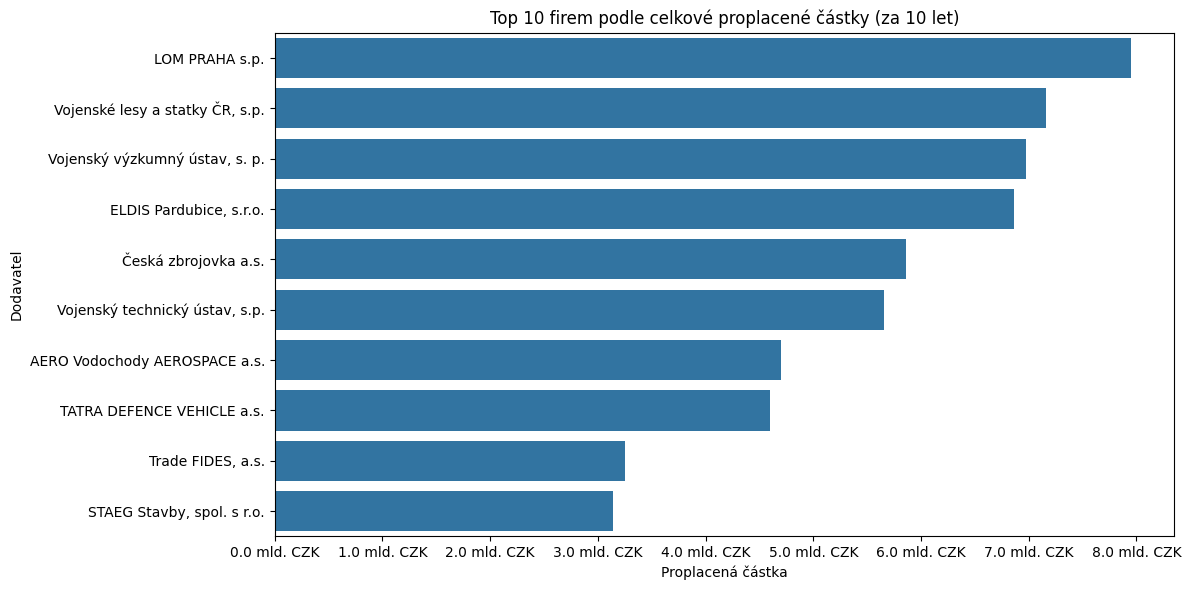

In [6]:
from matplotlib.ticker import FuncFormatter

# Sum all payments per company over all years
total_paid = df_grouped.groupby(['dodavatel_ičo', 'dodavatel_název'], as_index=False)['částka_uhrazená'].sum()

# Take top 10
top10_paid = total_paid.sort_values(by='částka_uhrazená', ascending=False).head(10)

def billions(x, _):
    return f'{x / 1_000_000_000:.1f} mld. CZK'

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10_paid,
    x='částka_uhrazená',
    y='dodavatel_název'
)
plt.title('Top 10 firem podle celkové proplacené částky (za 10 let)')
plt.xlabel('Proplacená částka')
plt.ylabel('Dodavatel')

plt.gca().xaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()


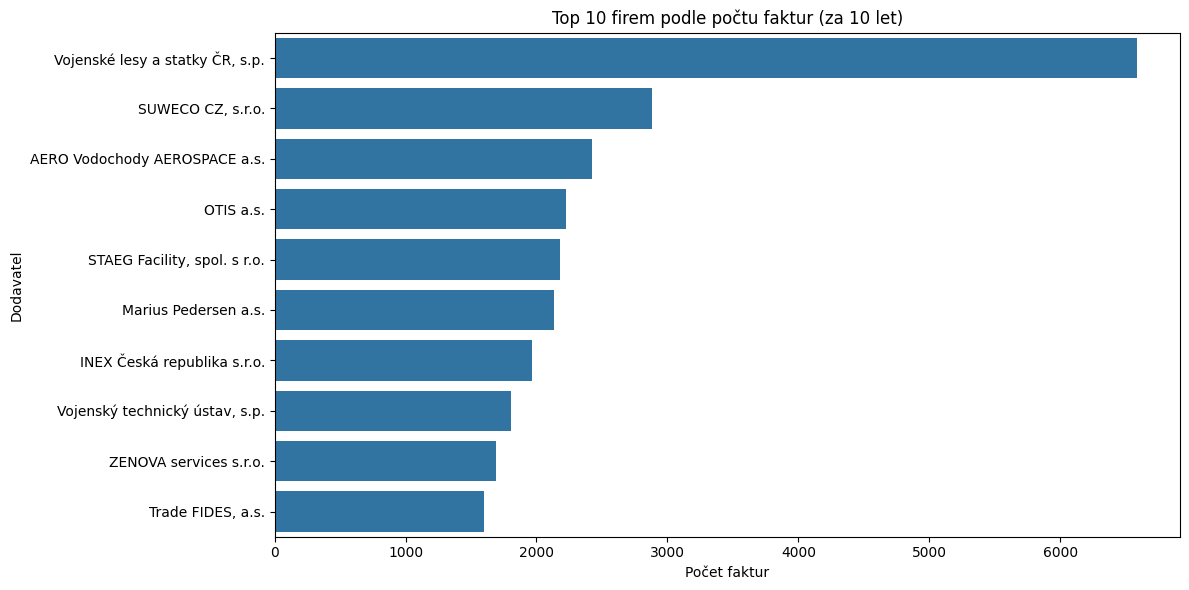

In [85]:
invoice_count = df_grouped.groupby(['dodavatel_ičo', 'dodavatel_název'], as_index=False)['počet_faktur'].sum()
top10 = invoice_count.sort_values(by='počet_faktur', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='počet_faktur', y='dodavatel_název')
plt.title('Top 10 firem podle počtu faktur (za 10 let)')
plt.xlabel('Počet faktur')
plt.ylabel('Dodavatel')
plt.tight_layout()
plt.show()


### ???
- Moc nerozumím ze zadání, co je záměrem posledního úkolu, tudíž jsem přiložil histogram podle vašeho popisu, který mi nedává smysl a pod něj jsem přidal scatter plot, který podle mého názoru vyjadřuje to, co bylo záměrem

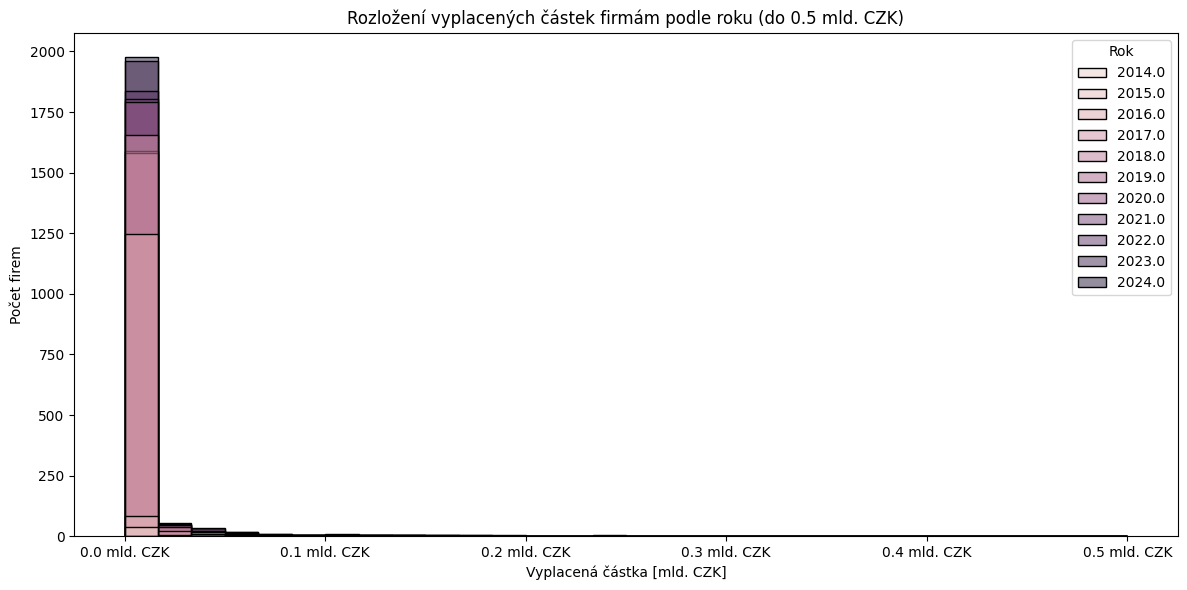

In [9]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df_grouped,
    x='částka_uhrazená',
    hue='Rok',
    bins=30,
    binrange=(0, 500_000_000)  # limit to 0.5 billion directly
)

plt.title('Rozložení vyplacených částek firmám podle roku (do 0.5 mld. CZK)')
plt.xlabel('Vyplacená částka [mld. CZK]')
plt.ylabel('Počet firem')

plt.gca().xaxis.set_major_formatter(FuncFormatter(billions))
plt.tight_layout()
plt.show()


In [10]:
df_summary = df_grouped.groupby('Rok').agg(
    celková_částka=('částka_uhrazená', 'sum'),
    počet_dodavatelů=('dodavatel_ičo', 'nunique')
).reset_index()

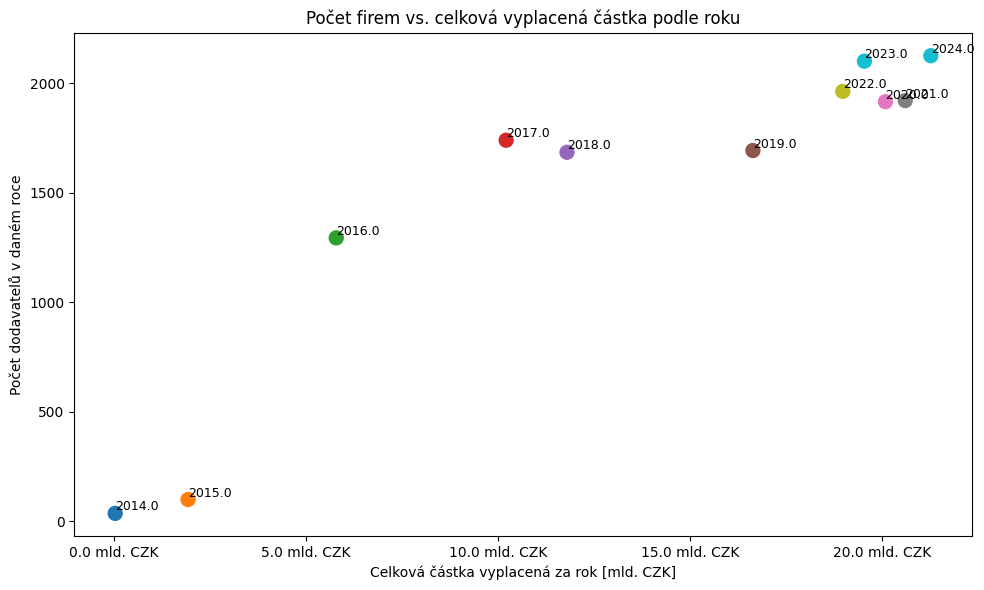

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_summary['celková_částka'],
    df_summary['počet_dodavatelů'],
    c=df_summary['Rok'],
    cmap='tab10',
    s=100
)

for _, row in df_summary.iterrows():
    plt.text(row['celková_částka'], row['počet_dodavatelů'], str(row['Rok']), fontsize=9,
             ha='left', va='bottom')

plt.xlabel('Celková částka vyplacená za rok [mld. CZK]')
plt.ylabel('Počet dodavatelů v daném roce')
plt.title('Počet firem vs. celková vyplacená částka podle roku')
plt.gca().xaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()
